In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-10-06 18:38:02.817788: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-10-06 18:38:05.782907: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-06 18:38:05.785163: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-10-06 18:38:06.136943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-06 18:38:06.139631: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key(y_train)

In [9]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13330, 512, 512, 1) (13330, 512, 512, 1) (3436, 512, 512, 1) (3436, 512, 512, 1)


In [10]:
X_train, y_train = C.Helper.filter_slices(X_train, y_train)

(572, 512, 512, 1) (572, 512, 512, 1)


In [11]:
X_train_set = X_train[:last_key]
y_train_set = y_train[:last_key]
X_val = X_train[last_key:]
y_val = y_train[last_key:]

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


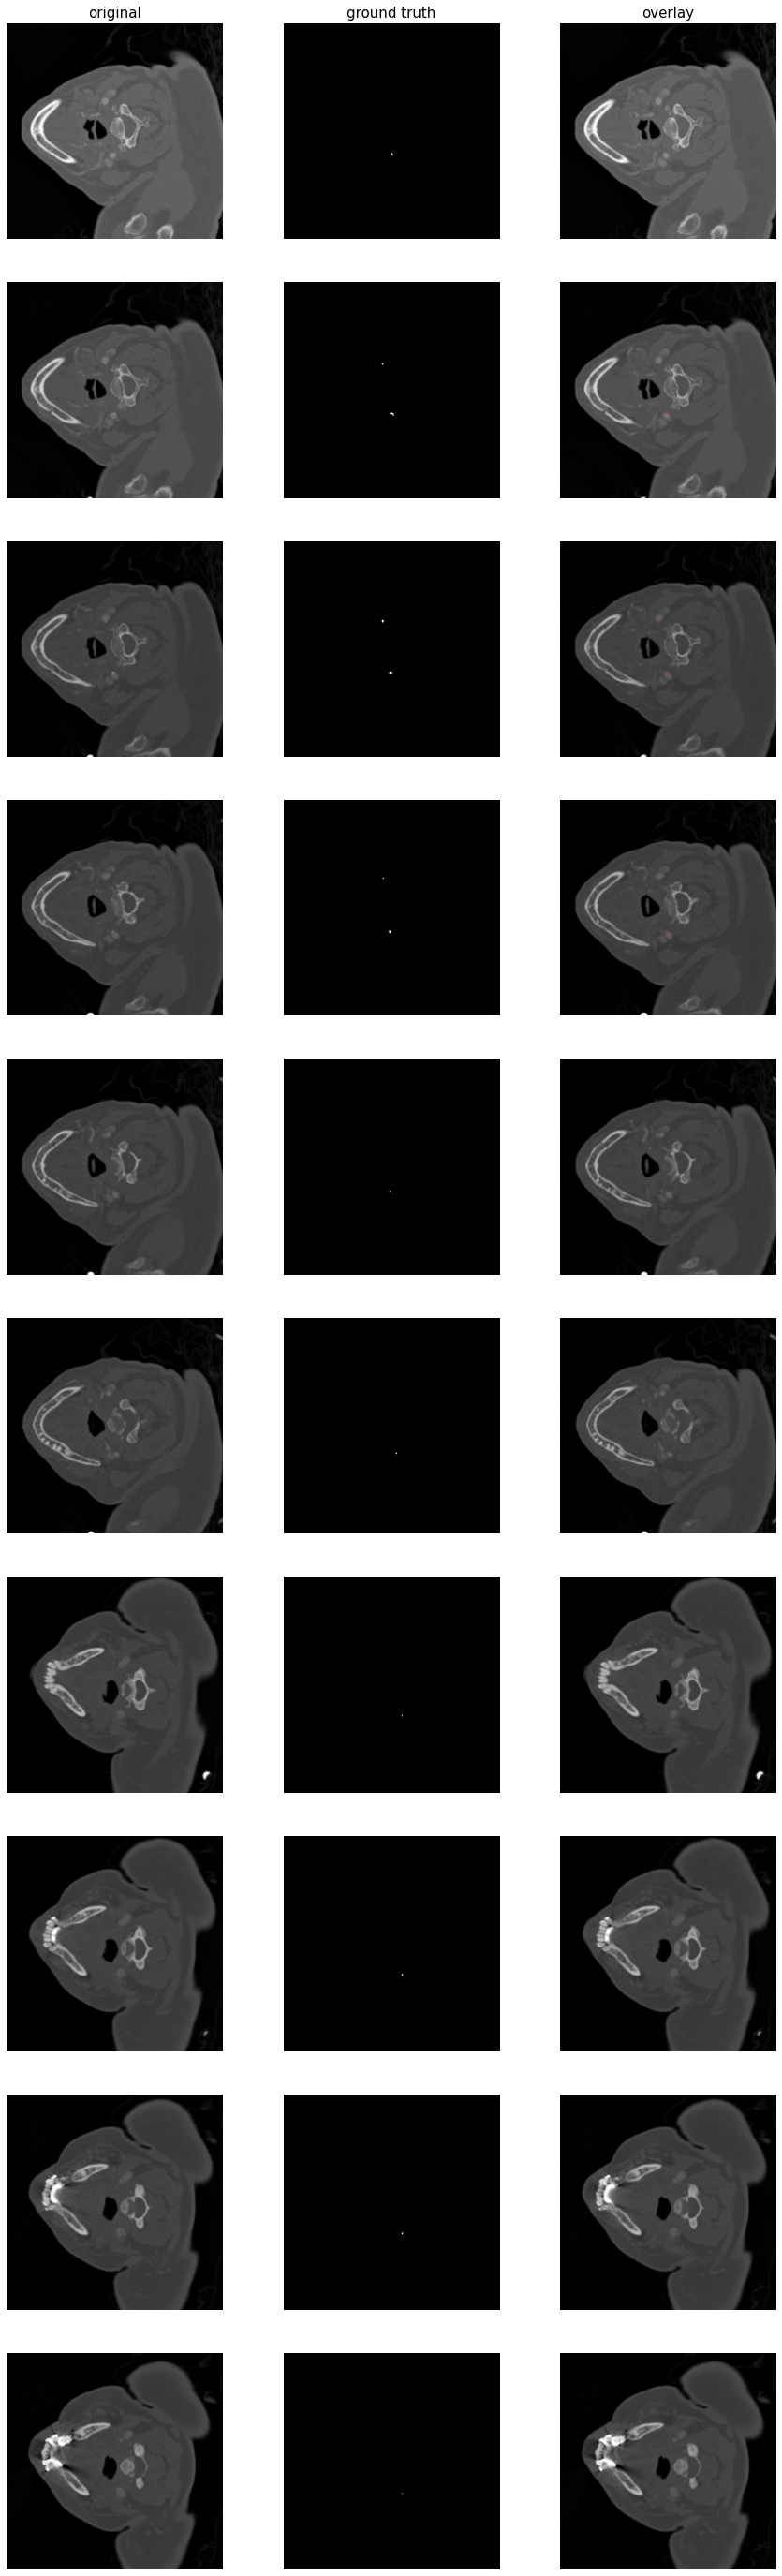

In [12]:
from keras_unet.utils import plot_imgs
plot_imgs(org_imgs=X_train_set, mask_imgs=y_train_set, nm_img_to_plot=10, figsize=5)

In [13]:
train_gen = C.Helper.augment_1(X_train_set, y_train_set)

In [14]:
model = C.Helper.create_unet(X_train_set[0].shape)

2023-10-06 18:40:43.244553: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-06 18:40:43.247165: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-06 18:40:43.256978: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-10-06 18:40:43.259983: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-06 18:40:43.262442: I tensorflow/core

In [15]:
model, history = C.Helper.train_unet(train_gen, X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2023-10-06 18:40:44.478996: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-10-06 18:40:44.500754: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-10-06 18:40:45.727249: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-10-06 18:40:46.641830: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-10-06 18:40:47.726731: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-10-06 18:40:47.726753: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-10-06 18:40:47.727119: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-10-06 18:40:48.762570: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-10-06 18:40:49.841306: I tensorflow/stream_exec

16/16 [==============================] - 63s 2s/step - loss: 2.4473 - iou: 7.4805e-05 - iou_thresholded: 6.4755e-04 - val_loss: 0.0272 - val_iou: 9.0124e-06 - val_iou_thresholded: 0.0014
Epoch 2/200
16/16 [==============================] - 15s 953ms/step - loss: 0.0455 - iou: 2.8838e-04 - iou_thresholded: 6.7534e-04 - val_loss: 0.0037 - val_iou: 4.6269e-04 - val_iou_thresholded: 0.0014
Epoch 3/200
16/16 [==============================] - 15s 952ms/step - loss: 0.0038 - iou: 2.0081e-04 - iou_thresholded: 6.9925e-04 - val_loss: 0.0026 - val_iou: 2.5441e-04 - val_iou_thresholded: 0.0014
Epoch 4/200
16/16 [==============================] - 15s 950ms/step - loss: 0.0024 - iou: 3.1139e-04 - iou_thresholded: 6.8985e-04 - val_loss: 0.0019 - val_iou: 3.2694e-04 - val_iou_thresholded: 0.0014
Epoch 5/200
16/16 [==============================] - 15s 952ms/step - loss: 0.0021 - iou: 4.0161e-04 - iou_thresholded: 7.1495e-04 - val_loss: 0.0016 - val_iou: 4.5602e-04 - val_iou_thresholded: 0.0014
Epoch

16/16 [==============================] - 15s 952ms/step - loss: 2.6333e-04 - iou: 0.4573 - iou_thresholded: 0.5826 - val_loss: 7.5599e-04 - val_iou: 0.1659 - val_iou_thresholded: 0.1869
Epoch 43/200
16/16 [==============================] - 15s 956ms/step - loss: 2.5508e-04 - iou: 0.4637 - iou_thresholded: 0.5855 - val_loss: 6.8353e-04 - val_iou: 0.1766 - val_iou_thresholded: 0.2151
Epoch 44/200
16/16 [==============================] - 15s 955ms/step - loss: 2.5670e-04 - iou: 0.4741 - iou_thresholded: 0.5938 - val_loss: 7.8939e-04 - val_iou: 0.1533 - val_iou_thresholded: 0.1707
Epoch 45/200
16/16 [==============================] - 15s 955ms/step - loss: 2.3568e-04 - iou: 0.4837 - iou_thresholded: 0.6127 - val_loss: 7.6792e-04 - val_iou: 0.1684 - val_iou_thresholded: 0.1818
Epoch 46/200
16/16 [==============================] - 15s 952ms/step - loss: 2.2812e-04 - iou: 0.5050 - iou_thresholded: 0.6232 - val_loss: 8.6877e-04 - val_iou: 0.1767 - val_iou_thresholded: 0.1938
Epoch 47/200
16/16

16/16 [==============================] - 15s 955ms/step - loss: 1.3804e-04 - iou: 0.6490 - iou_thresholded: 0.7382 - val_loss: 0.0011 - val_iou: 0.2018 - val_iou_thresholded: 0.2195
Epoch 84/200
16/16 [==============================] - 15s 952ms/step - loss: 1.3403e-04 - iou: 0.6559 - iou_thresholded: 0.7509 - val_loss: 0.0012 - val_iou: 0.1994 - val_iou_thresholded: 0.2107
Epoch 85/200
16/16 [==============================] - 15s 954ms/step - loss: 1.3130e-04 - iou: 0.6626 - iou_thresholded: 0.7516 - val_loss: 0.0012 - val_iou: 0.2041 - val_iou_thresholded: 0.2137
Epoch 86/200
16/16 [==============================] - 15s 953ms/step - loss: 1.3352e-04 - iou: 0.6596 - iou_thresholded: 0.7470 - val_loss: 0.0013 - val_iou: 0.1953 - val_iou_thresholded: 0.2061
Epoch 87/200
16/16 [==============================] - 15s 952ms/step - loss: 1.2697e-04 - iou: 0.6685 - iou_thresholded: 0.7563 - val_loss: 0.0011 - val_iou: 0.2181 - val_iou_thresholded: 0.2305
Epoch 88/200
16/16 [==================

Epoch 125/200
16/16 [==============================] - 15s 953ms/step - loss: 1.0370e-04 - iou: 0.7275 - iou_thresholded: 0.7987 - val_loss: 0.0017 - val_iou: 0.2083 - val_iou_thresholded: 0.2197
Epoch 126/200
16/16 [==============================] - 15s 956ms/step - loss: 9.8197e-05 - iou: 0.7269 - iou_thresholded: 0.8055 - val_loss: 0.0015 - val_iou: 0.2289 - val_iou_thresholded: 0.2392
Epoch 127/200
16/16 [==============================] - 15s 952ms/step - loss: 9.5849e-05 - iou: 0.7361 - iou_thresholded: 0.8087 - val_loss: 0.0017 - val_iou: 0.2197 - val_iou_thresholded: 0.2265
Epoch 128/200
16/16 [==============================] - 15s 959ms/step - loss: 9.4791e-05 - iou: 0.7399 - iou_thresholded: 0.8119 - val_loss: 0.0015 - val_iou: 0.2321 - val_iou_thresholded: 0.2425
Epoch 129/200
16/16 [==============================] - 15s 951ms/step - loss: 9.3098e-05 - iou: 0.7400 - iou_thresholded: 0.8115 - val_loss: 0.0014 - val_iou: 0.2527 - val_iou_thresholded: 0.2678
Epoch 130/200
16/16 

Epoch 167/200
16/16 [==============================] - 15s 954ms/step - loss: 7.0502e-05 - iou: 0.7950 - iou_thresholded: 0.8567 - val_loss: 0.0018 - val_iou: 0.2462 - val_iou_thresholded: 0.2560
Epoch 168/200
16/16 [==============================] - 15s 955ms/step - loss: 6.9499e-05 - iou: 0.8016 - iou_thresholded: 0.8603 - val_loss: 0.0021 - val_iou: 0.2289 - val_iou_thresholded: 0.2379
Epoch 169/200
16/16 [==============================] - 15s 952ms/step - loss: 7.1508e-05 - iou: 0.7921 - iou_thresholded: 0.8531 - val_loss: 0.0023 - val_iou: 0.2278 - val_iou_thresholded: 0.2316
Epoch 170/200
16/16 [==============================] - 15s 954ms/step - loss: 7.0012e-05 - iou: 0.8019 - iou_thresholded: 0.8614 - val_loss: 0.0023 - val_iou: 0.2224 - val_iou_thresholded: 0.2271
Epoch 171/200
16/16 [==============================] - 15s 953ms/step - loss: 6.7770e-05 - iou: 0.8008 - iou_thresholded: 0.8599 - val_loss: 0.0024 - val_iou: 0.2203 - val_iou_thresholded: 0.2275
Epoch 172/200
16/16 

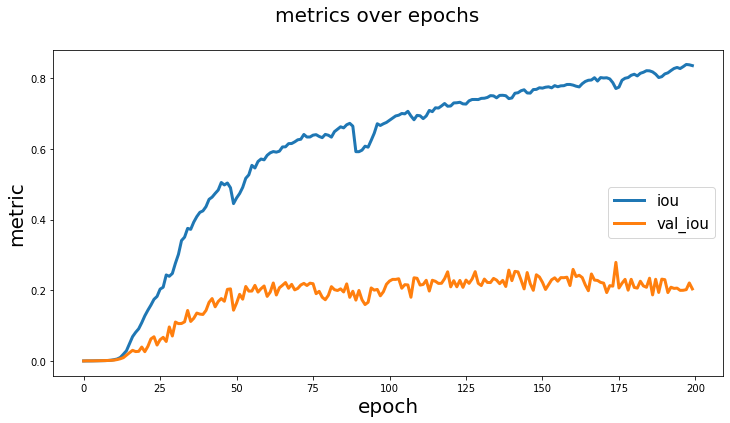

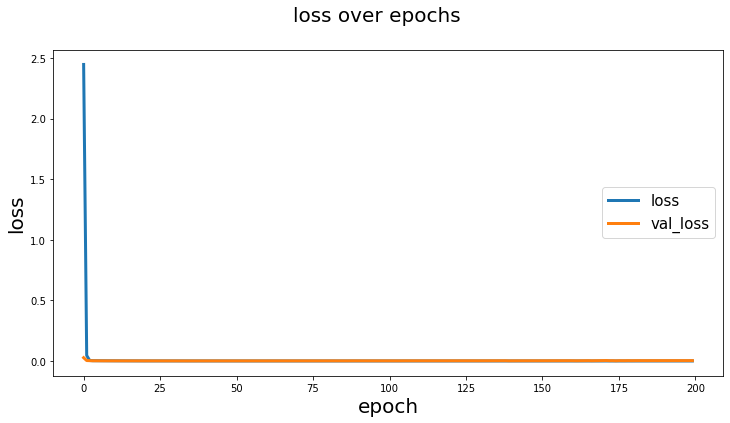

In [16]:
C.Helper.visualize_graph(history)

In [17]:
y_pred = C.Helper.prediction(X_test, model)

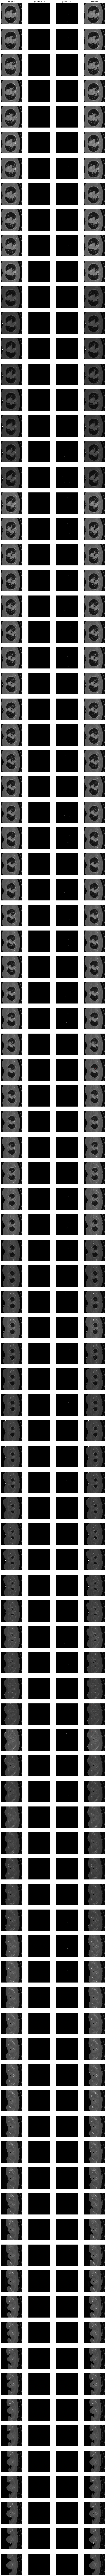

In [18]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [19]:
C.Helper.evaluate(X_test, y_test, model)

108/108 [==============================] - 24s 223ms/step - loss: 5.3580e-04 - iou: 0.0925 - iou_thresholded: 0.1098
